In [90]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
%matplotlib inline
df = pd.read_csv('Desktop/Thinkful/Austin_crime.csv')
df.head()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,2019891702,CRIMINAL TRESPASS,2716,N,03/30/2019 08:44:00 PM,03/30/2019,2044.0,03/30/2019 08:59:00 PM,03/30/2019,2059.0,...,11.00,C,03/30/2019,NaN,NaN,3117057.0,3117057.0,30.269060,-97.734085,"(30.26905967, -97.73408544)"
1,20195013370,THEFT,600,N,03/23/2019 06:00:00 PM,03/23/2019,1800.0,04/01/2019 03:47:00 PM,04/01/2019,1547.0,...,21.07,N,04/03/2019,23H,Theft,3133783.0,3133783.0,30.302208,-97.680177,"(30.30220794, -97.6801768)"
2,20172571868,AGG ROBBERY/DEADLY WEAPON,300,N,09/14/2017 10:37:00 PM,09/14/2017,2237.0,09/14/2017 10:37:00 PM,09/14/2017,2237.0,...,18.04,O,09/20/2017,120,Robbery,3125442.0,3125442.0,30.333542,-97.705762,"(30.33354183, -97.70576196)"
3,2019920086,FAMILY DISTURBANCE,3400,N,04/02/2019 01:49:00 AM,04/02/2019,149.0,04/02/2019 01:49:00 AM,04/02/2019,149.0,...,15.03,NaN,NaN,NaN,NaN,3125614.0,3125614.0,30.332481,-97.705246,"(30.3324806, -97.70524551)"
4,2019891685,POSS MARIJUANA,1803,N,03/30/2019 10:36:00 PM,03/30/2019,2236.0,03/30/2019 10:36:00 PM,03/30/2019,2236.0,...,7.00,C,04/02/2019,NaN,NaN,3117721.0,3117721.0,30.274861,-97.731825,"(30.27486103, -97.73182518)"


Your Report should accomplish these three goals:

**1** Describe and explore your dataset in the initial section of your Report. What does your data contain and what is its background? Where does it come from? Why is it interesting or significant? Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.

**2** Ask and answer analytic questions. Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviors or comparisons of the population.

**3** Propose further research. Lastly, make a proposal for a realistic future research project on this dataset that would use some data science techniques you'd like to learn in the bootcamp. Just like your earlier questions, your research proposal should present one or more clear questions. Then you should describe the techniques you would apply in order to arrive at an answer.



I'm going to use Austin Crime dataset 2002-2019 (found via kaggle). 
Austin is the number 1 city for immigration for last few years. The city grows and it's important to see if crime is increasing as well. 
The main goal of this report is to analyze crime records.

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2124418 entries, 0 to 2124417
Data columns (total 21 columns):
Highest Offense Description    object
Family Violence                object
Occurred Date Time             object
Occurred Date                  object
Occurred Time                  float64
Location Type                  object
Address                        object
Zip Code                       float64
Council District               float64
APD Sector                     object
APD District                   object
PRA                            object
Census Tract                   float64
UCR Category                   object
Category Description           object
X-coordinate                   float64
Y-coordinate                   float64
Latitude                       float64
Longitude                      float64
Location                       object
year                           float64
dtypes: float64(9), object(12)
memory usage: 340.4+ MB


Let's start with the most popular crimes.


In [92]:
df['Highest Offense Description'].value_counts()

BURGLARY OF VEHICLE               212785
THEFT                             196673
FAMILY DISTURBANCE                161009
CRIMINAL MISCHIEF                 117151
BURGLARY OF RESIDENCE              73760
ASSAULT W/INJURY-FAM/DATE VIOL     72306
PUBLIC INTOXICATION                67009
DWI                                66009
HARASSMENT                         58934
DISTURBANCE - OTHER                56855
CUSTODY ARREST TRAFFIC WARR        49490
THEFT BY SHOPLIFTING               43787
ASSAULT WITH INJURY                43096
WARRANT ARREST NON TRAFFIC         42129
RUNAWAY CHILD                      39008
AUTO THEFT                         36678
CRIMINAL TRESPASS                  35053
POSS MARIJUANA                     34843
POSS OF DRUG PARAPHERNALIA         32518
BURGLARY NON RESIDENCE             31254
POSS CONTROLLED SUB/NARCOTIC       29743
ASSAULT BY CONTACT                 27108
VIOL CITY ORDINANCE - OTHER        22346
IDENTITY THEFT                     19929
THEFT OF BICYCLE

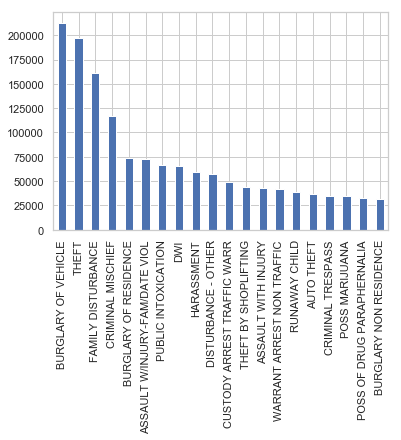

In [93]:
df['Highest Offense Description'].value_counts().head(20).plot(kind='bar')

In [94]:

df['year'] = pd.DatetimeIndex(df['Occurred Date Time']).year
df.head()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,year
0,2019891702,CRIMINAL TRESPASS,2716,N,03/30/2019 08:44:00 PM,03/30/2019,2044.0,03/30/2019 08:59:00 PM,03/30/2019,2059.0,...,C,03/30/2019,NaN,NaN,3117057.0,3117057.0,30.269060,-97.734085,"(30.26905967, -97.73408544)",2019.0
1,20195013370,THEFT,600,N,03/23/2019 06:00:00 PM,03/23/2019,1800.0,04/01/2019 03:47:00 PM,04/01/2019,1547.0,...,N,04/03/2019,23H,Theft,3133783.0,3133783.0,30.302208,-97.680177,"(30.30220794, -97.6801768)",2019.0
2,20172571868,AGG ROBBERY/DEADLY WEAPON,300,N,09/14/2017 10:37:00 PM,09/14/2017,2237.0,09/14/2017 10:37:00 PM,09/14/2017,2237.0,...,O,09/20/2017,120,Robbery,3125442.0,3125442.0,30.333542,-97.705762,"(30.33354183, -97.70576196)",2017.0
3,2019920086,FAMILY DISTURBANCE,3400,N,04/02/2019 01:49:00 AM,04/02/2019,149.0,04/02/2019 01:49:00 AM,04/02/2019,149.0,...,NaN,NaN,NaN,NaN,3125614.0,3125614.0,30.332481,-97.705246,"(30.3324806, -97.70524551)",2019.0
4,2019891685,POSS MARIJUANA,1803,N,03/30/2019 10:36:00 PM,03/30/2019,2236.0,03/30/2019 10:36:00 PM,03/30/2019,2236.0,...,C,04/02/2019,NaN,NaN,3117721.0,3117721.0,30.274861,-97.731825,"(30.27486103, -97.73182518)",2019.0


some of the data appear twice and I'm going to reduce columns removing repeated data.


In [95]:
del df['Incident Number']
del df['Highest Offense Code']
del df['Report Date Time']
del df['Report Date']
del df['Report Time']
del df['Clearance Status']
del df['Clearance Date']

In [96]:
df.head(5)

,Highest Offense Description,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Location Type,Address,Zip Code,Council District,APD Sector,...,PRA,Census Tract,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,year
0,CRIMINAL TRESPASS,N,03/30/2019 08:44:00 PM,03/30/2019,2044.0,GAS / SERVICE STATIONS,900 N IH 35 SVRD SB,78701.0,9.0,GE,...,383,11.00,NaN,NaN,3117057.0,3117057.0,30.269060,-97.734085,"(30.26905967, -97.73408544)",2019.0
1,THEFT,N,03/23/2019 06:00:00 PM,03/23/2019,1800.0,RESIDENCE / HOME,5512 GLOUCESTER LN,78723.0,1.0,ID,...,298,21.07,23H,Theft,3133783.0,3133783.0,30.302208,-97.680177,"(30.30220794, -97.6801768)",2019.0
2,AGG ROBBERY/DEADLY WEAPON,N,09/14/2017 10:37:00 PM,09/14/2017,2237.0,STREETS / HWY / ROAD / ALLEY,E ST JOHNS AVE / ROLAND JOHNSON DR,78752.0,4.0,ID,...,279,18.04,120,Robbery,3125442.0,3125442.0,30.333542,-97.705762,"(30.33354183, -97.70576196)",2017.0
3,FAMILY DISTURBANCE,N,04/02/2019 01:49:00 AM,04/02/2019,149.0,RESTAURANTS,7100 N IH 35 SVRD SB,78752.0,4.0,ID,...,279,15.03,NaN,NaN,3125614.0,3125614.0,30.332481,-97.705246,"(30.3324806, -97.70524551)",2019.0
4,POSS MARIJUANA,N,03/30/2019 10:36:00 PM,03/30/2019,2236.0,STREETS / HWY / ROAD / ALLEY,1500 N IH 35 SVRD SB,78701.0,1.0,BA,...,836,7.00,NaN,NaN,3117721.0,3117721.0,30.274861,-97.731825,"(30.27486103, -97.73182518)",2019.0


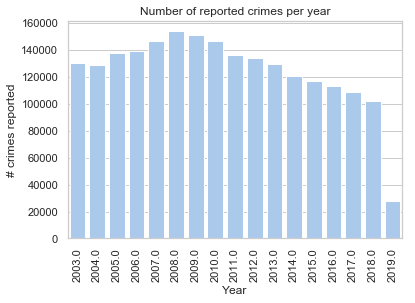

In [97]:
crimes_per_year = df['year'].value_counts().sort_index()

import seaborn as sns
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

g = sns.barplot(x=crimes_per_year.index, y=crimes_per_year.values,color='b')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set(xlabel='Year', ylabel='# crimes reported')
plt.title('Number of reported crimes per year')
plt.show()

Looks like there was a peak in crimes reported in 2008 but since then there's a steady decline

df['Highest Offense Description'].value_counts().head(20).plot(kind='bar') - the highest offence total
now I want to see the first 5 highest offences 2008-2019

In [137]:
for i in np.sort(df.year.unique()):
    print(i)
    print(df[df.year==i].groupby('Highest Offense Description').year.count().sort_values(ascending=False).head(5))
    

2003.0
Highest Offense Description
BURGLARY OF VEHICLE            16243
THEFT                           9833
CRIMINAL MISCHIEF               8333
FAMILY DISTURBANCE              7485
CUSTODY ARREST TRAFFIC WARR     5298
Name: year, dtype: int64
2004.0
Highest Offense Description
BURGLARY OF VEHICLE            15175
THEFT                          11429
FAMILY DISTURBANCE              7716
CRIMINAL MISCHIEF               7663
CUSTODY ARREST TRAFFIC WARR     5222
Name: year, dtype: int64
2005.0
Highest Offense Description
BURGLARY OF VEHICLE    15555
THEFT                  11953
FAMILY DISTURBANCE      9212
CRIMINAL MISCHIEF       8986
PUBLIC INTOXICATION     5279
Name: year, dtype: int64
2006.0
Highest Offense Description
BURGLARY OF VEHICLE    14480
THEFT                  13240
FAMILY DISTURBANCE      9694
CRIMINAL MISCHIEF       8676
PUBLIC INTOXICATION     5674
Name: year, dtype: int64
2007.0
Highest Offense Description
BURGLARY OF VEHICLE    16045
THEFT                  14565
FAMILY 

In [126]:
grouped = df.groupby('year', sort=False)['Highest Offense Description'].value_counts().head(20)
grouped


year    Highest Offense Description   
2019.0  BURGLARY OF VEHICLE               3166
        FAMILY DISTURBANCE                2801
        THEFT                             2452
        CRIMINAL MISCHIEF                 1398
        THEFT BY SHOPLIFTING               963
        ASSAULT W/INJURY-FAM/DATE VIOL     846
        DISTURBANCE - OTHER                784
        DWI                                711
        AUTO THEFT                         697
        ASSAULT WITH INJURY                688
        HARASSMENT                         674
        RUNAWAY CHILD                      586
        POSS CONTROLLED SUB/NARCOTIC       560
        BURGLARY NON RESIDENCE             489
        ASSAULT BY CONTACT                 487
        BURGLARY OF RESIDENCE              471
        POSS MARIJUANA                     468
        CRIMINAL TRESPASS                  458
        FRAUD - OTHER                      389
        DATING DISTURBANCE                 271
Name: Highest Offense